Using the data

1. Now do some exploratory data analysis to figure out which variables have direct and clear impact on employees retention(i.e whether they leave the company or continue to work)
2. Plot bar charts showing impact of employee salaries on retention
3. Plot bar charts showing correlation between department and employee retention
4. Now build logistic regression model using variables that were narrowed down in step 1
5. Measure the accuracy of the model


In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
df = insurance = pd.read_csv("HR_comma_sep 1.csv")
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [3]:
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
14994     True
14995     True
14996     True
14997     True
14998     True
Length: 14999, dtype: bool

In [5]:
df.duplicated().sum()

np.int64(3008)

In [6]:
df.drop_duplicates(inplace = True)

In [7]:
df.shape

(11991, 10)

In [8]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [9]:
print(df.corr(numeric_only = True)
["left"].sort_values(ascending = False))

left                     1.000000
time_spend_company       0.173295
average_montly_hours     0.070409
number_project           0.030928
last_evaluation          0.013520
promotion_last_5years   -0.044657
Work_accident           -0.125436
satisfaction_level      -0.350558
Name: left, dtype: float64


From correlation:

satisfaction_level (strongest impact)

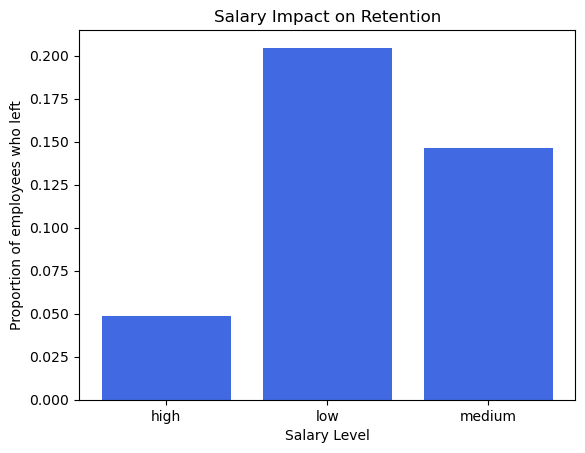

In [10]:
# 2. Plot bar charts showing impact of employee salaries on retention

salary_retention = df.groupby("salary") ["left"].mean()
plt.figure
plt.bar(salary_retention.index, salary_retention.values, color = "royalblue")
plt.xlabel("Salary Level")
plt.ylabel("Proportion of employees who left")
plt.title("Salary Impact on Retention")
plt.show()

Low salary employees leave more frequently.

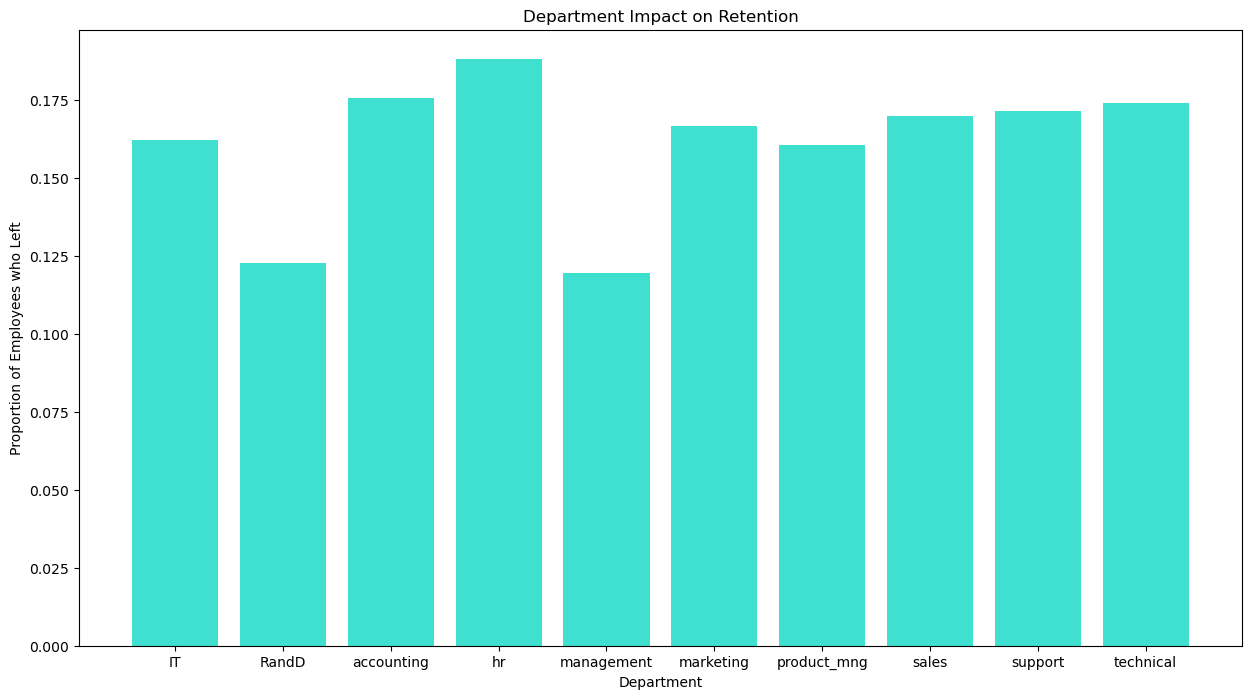

In [11]:
# 3.Plot bar charts showing correlation between department and employee retention

dept_retention = df.groupby("Department") ["left"].mean()
plt.figure(figsize =(15,8))
plt.bar(dept_retention.index, dept_retention.values, color = "turquoise")
plt.xlabel("Department")
plt.ylabel("Proportion of Employees who Left")
plt.title("Department Impact on Retention")
plt.show()

Some departments like HR and accounting show higher exit rates.

In [12]:
# 4. Now build logistic regression model using variables that were narrowed down in step 1

# convert salary to numeric
df["salary"]= df["salary"].map({"low": 0, "medium": 1, "high": 2})

# selecting variables
X = df[["satisfaction_level", "time_spend_company", "Work_accident", "promotion_last_5years", "salary"]]

y = df["left"]



In [13]:
#Split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7)

In [14]:
model = LogisticRegression(max_iter = 500)

In [15]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [16]:
# 5.Measure the accuracy of the model

model.score(X_test, y_test)

0.8463035019455253

Model achieved approximately 84% accuracy